# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


# Setup

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


In [2]:
# Importacoes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Importacao do dataset
df = pd.read_csv("laptops.csv")

In [4]:
# Visualizar as primeiras linhas
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


### Aplicar uma Regressao Linear Simples

In [5]:
# Instancaiar a regressao
lm = LinearRegression()

In [7]:
# Definir as variaveis preditoras e alvo
x = df[['CPU_frequency']]
y = df["Price"]

In [8]:
# Ajusta os dados
lm.fit(x, y)

LinearRegression()

In [9]:
# Faz a predicao
Yhat = lm.predict(x)

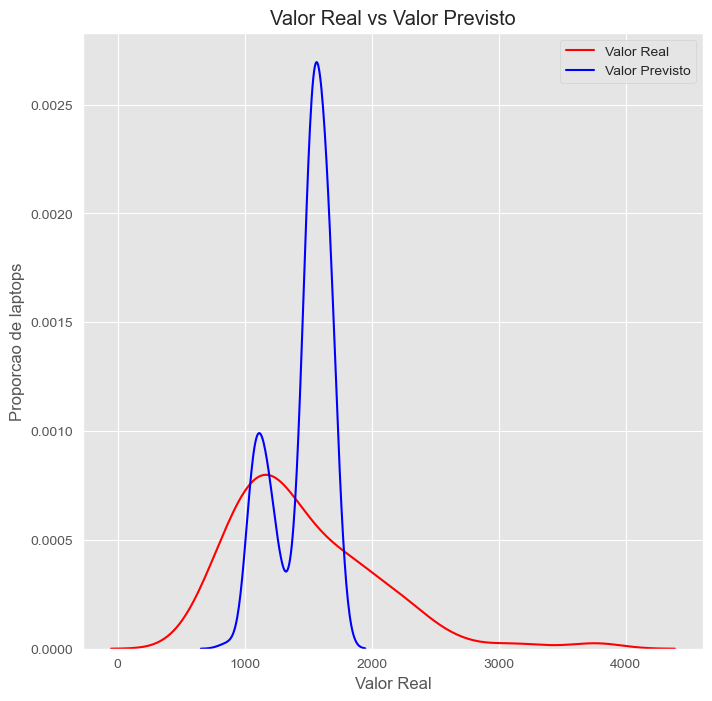

In [12]:
# Grafico de distribuicao para os valores previstos e valores reais
plt.figure(figsize=(8, 8))
ax1 = sns.distplot(y, hist=False, color='r', label="Valor Real")
sns.distplot(Yhat, hist=False, color='b', label="Valor Previsto", ax=ax1)

plt.title("Valor Real vs Valor Previsto")
plt.xlabel("Valor Real")
plt.ylabel("Proporcao de laptops")
plt.legend()

plt.show();

In [13]:
# Calcular o MSE e o R-squared
mse = mean_squared_error(y, Yhat)
r2_score = lm.score(x, y)
print("MSE: ", mse)
print("R2 Score: ", r2_score)

MSE:  284583.4405868629
R2 Score:  0.1344436321024326


### Regressao Linear Multipla
Os parametros que tem um p-valor baixo o suficiente para indicar uma relacao forte com "Price" sao "CPU_frequency", 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' e 'Category'. Vamos usar essas variaveis para a regressao linear multipla.

In [14]:
# Definindo as variaveis preditoras e alvo
Z = df[["CPU_frequency", 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
y = df['Price']

In [15]:
# Ajustar o modelo
lm.fit(Z, y)

LinearRegression()

In [16]:
# Fazer as previsoes
Yhat = lm.predict(Z)

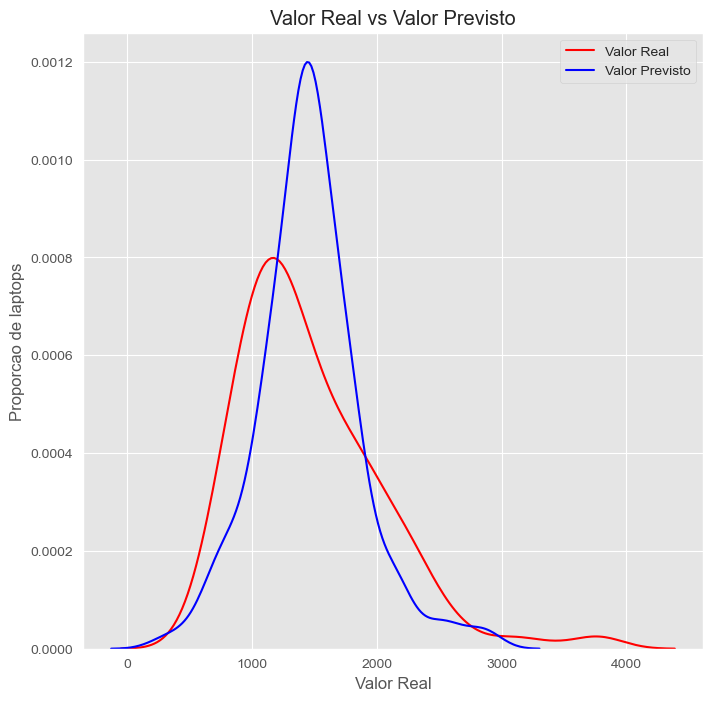

In [17]:
# Grafico de distribuicao
plt.figure(figsize=(8, 8))
ax1 = sns.distplot(y, hist=False, color='r', label="Valor Real")
sns.distplot(Yhat, hist=False, color='b', label="Valor Previsto", ax=ax1)

plt.title("Valor Real vs Valor Previsto")
plt.xlabel("Valor Real")
plt.ylabel("Proporcao de laptops")
plt.legend()
plt.show();

In [18]:
# Calcular o MSE e o R-squared
mse = mean_squared_error(y, Yhat)
r2_score = lm.score(Z, y)
print("MSE: ", mse)
print("R2 Score: ", r2_score)

MSE:  161680.57263893107
R2 Score:  0.5082509055187374


### Regressao Polinomial

In [20]:
# Creacao do modelo polinomial usando 3 graus diferentes

X = x.to_numpy().flatten()
f1 = np.polyfit(X, y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, y, 5)
p5 = np.poly1d(f5)

In [21]:
# Regressao polinomial
def PlotPoly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
    plt.title(f"Polynomial Fit for Price ~ {Name}")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    plt.show()
    plt.close();

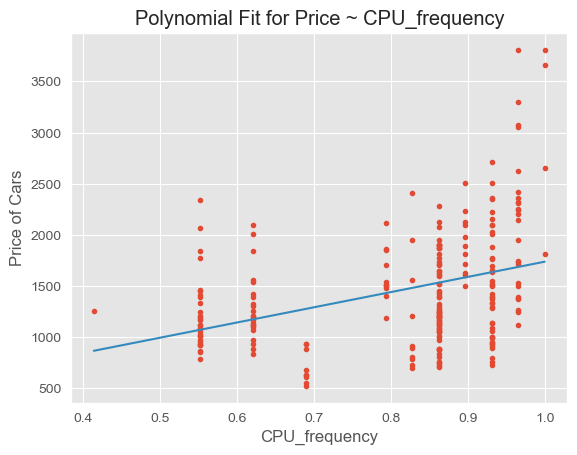

In [22]:
PlotPoly(p1, X, y, "CPU_frequency")

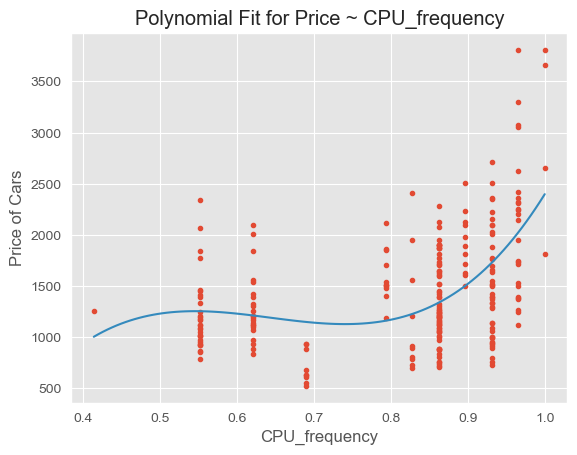

In [23]:
PlotPoly(p3, X, y, "CPU_frequency")

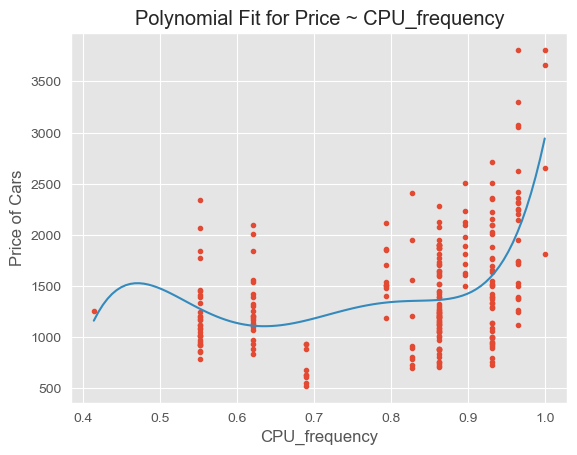

In [24]:
PlotPoly(p5, X, y, "CPU_frequency")

In [30]:
# Avaliacao usando MSE e R-squared
r2_1 = r2_score(y, p1(X))
r2_3 = r2_score(y, p3(X))
r2_5 = r2_score(y, p5(X))

print("R2 Score 1: ", r2_1)
print("MSE 1: ", mean_squared_error(y, p1(X)))
print("R2 Score 3: ", r2_3)
print("MSE 3: ", mean_squared_error(y, p3(X)))
print("R2 Score 5: ", r2_5)
print("MSE 5: ", mean_squared_error(y, p5(X)))

TypeError: 'numpy.float64' object is not callable